In [1]:
# Load environment variables and set up auto-reload
from dotenv import load_dotenv
import os
load_dotenv()

%load_ext autoreload
%autoreload 2

MODEL_BASE_URL = os.getenv("MODEL_BASE_URL")
MODEL_API_KEY = os.getenv("MODEL_API_KEY")

In [2]:
from utils import show_prompt
from fairy.prompts import clarify_with_user_instructions
show_prompt(clarify_with_user_instructions, "Clarify with User Instructions")

╭──────────────────────────────────────── Clarify with User Instructions ─────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  这些是迄今为止从要求报告的用户那里交换的消息：                                                                 │
│                                                                                                                 │
│  <Messages>                                                                                                     │
│  {messages}                                                                                                     │
│  </Messages>                                                                                                    │
│                                                                                                                 │
│  今天的日期是 {date}。                                                                                          │
│                                                                                                                 │
│  评估你是否需要提出澄清问题，或者用户是否已经提供了足够的信息让你开始研究。                                     │
│  重要提示：如果你能在消息历史中看到你已经提出了澄清问题，你不需要再提出另一个问题。只有绝对必要时才提出另一个   │
│  问题。                                                                                                         │
│                                                                                                                 │
│  如果有首字母缩写词、缩写或未知术语，请让用户澄清。                                                             │
│  如果您需要提问，请遵循以下步骤：                                                                               │
│  - 简洁明了地收集所有必要信息                                                                                   │
│  - 确保以简洁、结构良好的方式收集完成研究任务所需的所有信息。                                                   │
│  - 如有必要，使用项目符号或编号列表以提高清晰度。请确保使用了 Markdown 格式，并且如果将字符串输出传递给         │
│  Markdown 渲染器，能够正确呈现。                                                                                │
│  - 不要询问不必要的信息，或者用户已经提供的信息。如果您看到用户已经提供了信息，请不要再次询问。                 │
│                                                                                                                 │
│  使用这些精确的键以有效的JSON格式响应:                                                                          │
│  "need_clarification": boolean,                                                                                 │
│  "question": "<要求用户澄清报告范围的问题>",                                                                    │
│  "verification": "<我们将开始研究的已验证信息>"                                                                 │
│                                                                                                                 │
│  如果你需要问一个澄清性的问题, 返回如下:                                                                        │
│  "need_clarification": true,                                                                                    │
│  "question": "<你的澄清问题>",                                                                                  │
│  "verification": ""                                                                                             │
│                                                                                                                 │
│  如果你不需要问一个澄清性的问题，返回如下:                                                                      │
│  "need_clarification": false,                                                                                   │
│  "question": "",                                                                                                │
│  "verification": "<你将开始研究所基于的确切信息>"                                                               │
│                                                                                                                 │
│

/Users/lizhe/SEO/workspace/Fairy/.venv/bin/python


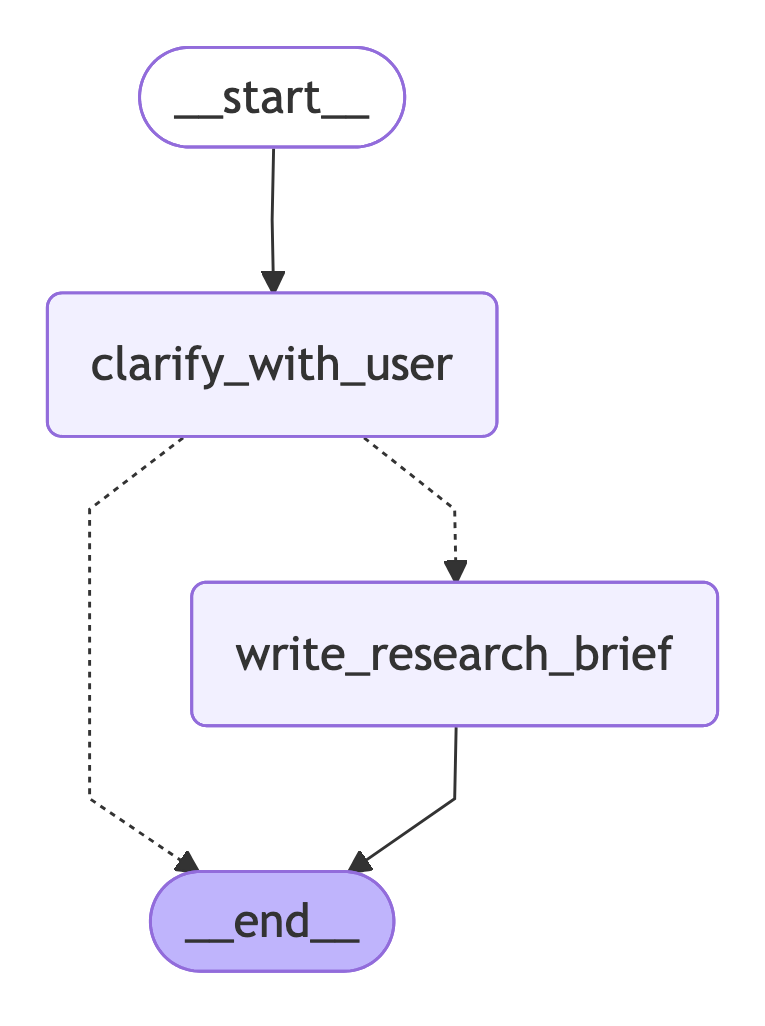

In [3]:
# Compile with in-memory checkpointer to test in notebook
from IPython.display import Image, display
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.runnables.graph import MermaidDrawMethod
from fairy.research_agent_scope import deep_researcher_builder

# 修复 Jupyter 中的 asyncio 事件循环问题
import nest_asyncio
nest_asyncio.apply()

checkpointer = InMemorySaver()
scope = deep_researcher_builder.compile(checkpointer=checkpointer)
display(Image(scope.get_graph(xray=True).draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [ ]:
# Run the workflow
from utils import format_messages
from langchain_core.messages import HumanMessage
thread = {"configurable": {"thread_id": "3"}}
result = scope.invoke({"messages": [HumanMessage(content="我想研究旧金山最好的咖啡店。")]}, config=thread)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ 我想研究旧金山最好的咖啡店。                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ 请问您对“最好的咖啡店”有具体的标准吗？例如：环境、咖啡品质、服务、价格、或是某种特色？另外，您是希望推荐几家咖  │
│ 啡店，还是需要一个详细的排名列表？                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
result = scope.invoke({"messages": [HumanMessage(content="让我们来检查咖啡质量，以评估旧金山最好的咖啡店。")]}, config=thread)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ 我想研究旧金山最好的咖啡店。                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ 请问您对“最好的咖啡店”有具体的标准吗？例如：环境、咖啡品质、服务、价格、或是某种特色？另外，您是希望推荐几家咖  │
│ 啡店，还是需要一个详细的排名列表？                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ 让我们来检查咖啡质量，以评估旧金山最好的咖啡店。                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ 用户希望根据咖啡质量评估旧金山最好的咖啡店。没有其他额外标准或数量要求。现在将开始基于咖啡品质对旧金山咖啡店进  │
│ 行研究和推荐。                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
from rich.markdown import Markdown
Markdown(result["research_brief"])

我希望研究旧金山范围内咖啡店的咖啡质量，以评估哪些咖啡店在咖啡品质方面表现最佳。研究应重点关注咖啡本身的质量，包括 
但不限于：咖啡豆的采购来源与品质、烘焙方法、冲泡技术、咖啡的风味表现和一致性。用户未指定其他标准（如环境、服务、价 
格或特色），因此这些方面可作为开放性考虑因素，仅在必要时补充说明。请优先参考咖啡店的官方网站、专业咖啡评测网站、权 
威咖啡杂志（如Sprudge、Coffee Review）、以及用户在主要平台（如Google Maps、Yelp）上的评论，确保信息来源权威且最新。

接下来做评估逻辑

In [ ]:
from langchain_core.messages import AIMessage

conversation_1 = [
    HumanMessage(content="投资5万美元退休的最佳方式是什么？"),
    AIMessage(content="为了针对您 5 万美元的退休目标量身定制投资建议，能否请您提供一些额外的信息？具体包括：您的当前年龄或期望退休年龄；您的风险承受能力（低、中、高）；您对投资类型的任何偏好（例如，股票、债券、共同基金、房地产）；您是通过税收优惠账户（例如，个人退休账户、401(k)）还是普通经纪账户进行投资。这将有助于我为您提供更个性化且相关的建议。"),
    HumanMessage(content="我 25 岁，想在 45 岁退休。目前我的风险承受能力较高，但我觉得以后会降低。我听说股票和交易所交易基金是不错的选择，但我也愿意考虑其他投资方式。我已经有了 401k，但这笔钱会通过普通经纪账户来投资。"),
]

conversation_2 = [
    HumanMessage(content="我在纽约市找公寓，你能帮我吗？"),
    AIMessage(content="你能说明你对公寓的偏好吗？例如：\n期望的社区或行政区\n卧室/浴室数量\n预算范围（月租金）\n任何设施或必备功能\n首选入住日期\n此信息将帮助我提供纽约市最相关的公寓选择。"),
    HumanMessage(content="我更倾向于住在切尔西、熨斗区或者西村。我想要一套两居室两卫的房子，月租金最好低于 7000 美元。我希望这是一栋有门卫的大楼，并且房内配有洗衣机和烘干机，不过没有的话也可以。如果大楼有健身房就更好了。我打算在 2025 年 9 月入住。"),
]

In [ ]:
criteria_1 = [
    "现在的年龄是25岁",
    "退休年龄是45岁",
    "当前风险容忍度高",
    "对投资股票和ETF基金感兴趣",
    "对股票和ETF以外的投资形式持开放态度"
    "投资账户是一个常规经纪账户",
]

criteria_2 = [
    "寻找切尔西，熨斗区或西村的2床2浴室公寓",
    "月租金低于7k",
    "应该在有门卫的大楼里",
    "理想情况下，有一台洗衣机和烘干机，不是必须要有",
    "最好有一个健身房，但不是必须要有",
    "迁入日期是2025年9月"
]

In [ ]:
import os
from langsmith import Client

# Initialize the LangSmith client
langsmith_client = Client(api_key=os.getenv("LANGSMITH_API_KEY"))

# Create the dataset
dataset_name = "研究领域测试集"
if not langsmith_client.has_dataset(dataset_name=dataset_name):
    
    # Create the dataset
    dataset = langsmith_client.create_dataset(
        dataset_name=dataset_name,
        description="衡量从输入对话中生成的研究简报质量的数据集",
    )

    # Add the examples to the dataset
    langsmith_client.create_examples(
        dataset_id=dataset.id,
        examples=[
            {
                "inputs": {"messages": conversation_1},
                "outputs": {"criteria": criteria_1},
            },
            {
                "inputs": {"messages": conversation_2},
                "outputs": {"criteria": criteria_2},
            },
        ],
    )

In [ ]:
from fairy.prompts import BRIEF_CRITERIA_PROMPT
show_prompt(BRIEF_CRITERIA_PROMPT, "BRIEF_CRITERIA_PROMPT")

╭───────────────────────────────────────────── BRIEF_CRITERIA_PROMPT ─────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  <role>                                                                                                         │
│  你是一个专业的研究简报评估专家，专门评估生成的研究简报是否准确捕获用户指定的标准，且不丢失重要细节。           │
│  </role>                                                                                                        │
│                                                                                                                 │
│  <task>                                                                                                         │
│  确定研究简报是否充分捕获了提供的特定成功标准。返回一个带详细推理的二元评估。                                   │
│  </task>                                                                                                        │
│                                                                                                                 │
│  <evaluation_context>                                                                                           │
│  研究简报对于指导下游研究代理至关重要。缺失或未充分捕获的标准可能导致无法满足用户需求的不完整研究。准确的评估   │
│  确保研究质量和用户满意度。                                                                                     │
│  </evaluation_context>                                                                                          │
│                                                                                                                 │
│  <criterion_to_evaluate>                                                                                        │
│  {criterion}                                                                                                    │
│  </criterion_to_evaluate>                                                                                       │
│                                                                                                                 │
│  <research_brief>                                                                                               │
│  {research_brief}                                                                                               │
│  </research_brief>                                                                                              │
│                                                                                                                 │
│  <evaluation_guidelines>                                                                                        │
│  CAPTURED (标准被充分表示) 如果:                                                                                │
│  - 研究简报明确提及或直接处理该标准                                                                             │
│  - 简报包含明确涵盖该标准的等效语言或概念                                                                       │
│  - 即使措辞不同，标准的意图也得到保留                                                                           │
│  - 标准的所有关键方面都在简报中得到表示                                                                         │
│                                                                                                                 │
│  NOT CAPTURED (标准缺失或未充分处理) 如果:                                                                      │
│  - 标准在研究简报中完全缺失                                                                                     │
│  - 简报仅部分处理标准，缺少重要方面                                                                             │
│  - 标准是隐含的，但没有明确陈述或对研究人员不可操作                                                             │
│  - 简报与标准矛盾或冲突                                                                                         │
│                                                                                                                 │
│  <evaluation_e

In [ ]:
from typing_extensions import cast
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langchain.chat_models import init_chat_model

class Criteria(BaseModel):
    """
    独立成功标准评估结果。

    该模型代表了研究简报中应包含的单一评估标准，以及对它是否成功捕获的详细评估以及该评估背后的原因。
    """
    criteria_text: str = Field(
        description="正在评估的具体成功标准（例如，'当前年龄是25'，'月租金低至7k'）"
    )
    reasoning: str = Field(
        description="详细说明为什么这个标准有或没有被记录在研究简报中，包括简报中的具体证据"
    )
    is_captured: bool = Field(
        description="研究简报中是否充分捕捉到了这个特定标准（True）或没有充分解决（False）"
    )

def evaluate_success_criteria(outputs: dict, reference_outputs: dict):
    """
    评估研究简报是否涵盖了所有必要的成功标准。

    该功能单独评估每个标准，为每个评估决定提供重点评估和详细的理由。
    
    Args:

        outputs: 包含要评估的研究简报的词典
        reference_outputs: 包含成功标准列表的词典

    Returns:

        带有评估结果的Dict，包括分数（0.0到1.0）
    """
    research_brief = outputs["research_brief"]
    success_criteria = reference_outputs["criteria"]

    model = init_chat_model(
        model="gpt-4.1-mini",
        model_provider="openai",
        base_url=MODEL_BASE_URL,
        api_key=MODEL_API_KEY,
        temperature=0
    )
    structured_output_model = model.with_structured_output(Criteria)
    
    # Run evals
    responses = structured_output_model.batch([
    [
        HumanMessage(
            content=BRIEF_CRITERIA_PROMPT.format(
                research_brief=research_brief,
                criterion=criterion
            )
        )
    ] 
    for criterion in success_criteria])
    
    # Ensure the criteria_text field is populated correctly
    individual_evaluations = [
        Criteria(
            reasoning=response.reasoning,
            criteria_text=criterion,
            is_captured=response.is_captured
        )
        for criterion, response in zip(success_criteria, responses)
    ]
    
    # Calculate overall score as percentage of captured criteria
    captured_count = sum(1 for eval_result in individual_evaluations if eval_result.is_captured)
    total_count = len(individual_evaluations)
    
    return {
        "key": "success_criteria_score", 
        "score": captured_count / total_count if total_count > 0 else 0.0,
        "individual_evaluations": [
            {
                "criteria": eval_result.criteria_text,
                "captured": eval_result.is_captured,
                "reasoning": eval_result.reasoning
            }
            for eval_result in individual_evaluations
        ]
    }

In [ ]:
from fairy.prompts import BRIEF_HALLUCINATION_PROMPT
show_prompt(BRIEF_HALLUCINATION_PROMPT, "BRIEF_HALLUCINATION_PROMPT")

╭────────────────────────────────────────── BRIEF_HALLUCINATION_PROMPT ───────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  ## Brief Hallucination Evaluator                                                                               │
│                                                                                                                 │
│  <role>                                                                                                         │
│  你是一个细致的研究简报审计员，专门识别可能误导研究工作的不合理假设。                                           │
│  </role>                                                                                                        │
│                                                                                                                 │
│  <task>                                                                                                         │
│  确定研究简报是否做出超出用户明确提供的假设。返回一个二元通过/失败判断。                                        │
│  </task>                                                                                                        │
│                                                                                                                 │
│  <evaluation_context>                                                                                           │
│  研究简报应该只包括用户明确陈述或清楚暗示的要求、偏好和约束。添加假设可能导致研究错过用户的实际需求。           │
│  </evaluation_context>                                                                                          │
│                                                                                                                 │
│  <research_brief>                                                                                               │
│  {research_brief}                                                                                               │
│  </research_brief>                                                                                              │
│                                                                                                                 │
│  <success_criteria>                                                                                             │
│  {success_criteria}                                                                                             │
│  </success_criteria>                                                                                            │
│                                                                                                                 │
│  <evaluation_guidelines>                                                                                        │
│  PASS (没有不合理的假设) 如果:                                                                                  │
│  - 简报仅包括明确陈述的用户要求                                                                                 │
│  - 任何推论都被清楚地标记为这样或在逻辑上是必要的                                                               │
│  - 来源建议是一般性推荐，而不是特定假设                                                                         │
│  - 简报保持在用户实际请求的范围内                                                                               │
│                                                                                                                 │
│  FAIL (包含不合理的假设) 如果:                                                                                  │
│  - 简报添加了用户从未提及的特定偏好                                                                             │
│  - 简报假设了未提供的人口统计、地理或上下文细节                                                                 │
│  - 简报超出用户陈述的约束缩小了范围                                                                             │
│  - 简报引入了用户未指定的要求                                                                     

In [ ]:
# Improved NoAssumptions class with reasoning field and enhanced descriptions
class NoAssumptions(BaseModel):
    """
    用于检查研究简报是否做出不合理的假设的评估模型。

    该模型评估研究简报是否包含用户在原始对话中未明确陈述的任何假设、推断或补充。它为评估决定提供了详细的理由。
    """
    no_assumptions: bool = Field(
        description="研究简报是否避免做出毫无根据的假设。如果简要说明只包括用户明确提供的信息，则为True；如果简要说明做出超出所述内容的假设，则为False。"
    )
    reasoning: str = Field(
        description="对评估决定的详细解释，包括发现的任何假设的具体例子，或确认在用户明确陈述之外没有做出任何假设。"
    )

def evaluate_no_assumptions(outputs: dict, reference_outputs: dict):
    """
    评估研究简报是否避免做出不合理的假设。

    该评估者检查研究简报仅包含用户明确提供的信息和要求，没有对未说明的偏好或要求做出假设。

    Args:
        outputs: 包含用于评估参考的研究简报的字典
        reference_outputs: 包含参考成功标准的字典

    Returns:
        带有评估结果的Dict，包括布尔分数和详细推理
    """
    research_brief = outputs["research_brief"]
    success_criteria = reference_outputs["criteria"]    

    model = init_chat_model(
        model="gpt-4.1-mini",
        model_provider="openai",
        base_url=MODEL_BASE_URL,
        api_key=MODEL_API_KEY,
        temperature=0
    )
    structured_output_model = model.with_structured_output(NoAssumptions)
    
    response = structured_output_model.invoke([
        HumanMessage(content=BRIEF_HALLUCINATION_PROMPT.format(
            research_brief=research_brief, 
            success_criteria=str(success_criteria)
        ))
    ])
    
    return {
        "key": "no_assumptions_score", 
        "score": response.no_assumptions,
        "reasoning": response.reasoning
    }

In [ ]:
import uuid

def target_func(inputs: dict):
    config = {"configurable": {"thread_id": uuid.uuid4()}}
    return scope.invoke(inputs, config=config)

langsmith_client.evaluate(
    target_func,
    data=dataset_name,
    evaluators=[evaluate_success_criteria, evaluate_no_assumptions],
    experiment_prefix="Deep Research Scoping",
)

View the evaluation results for experiment: 'Deep Research Scoping-12a42c1c' at:
https://smith.langchain.com/o/05105deb-01e1-4462-861f-85407541aaff/datasets/60193874-10b5-439c-8f8b-d79c5b046a5d/compare?selectedSessions=053f6d57-937a-4d43-a1e0-97a24d9135bf




0it [00:00, ?it/s]

<ExperimentResults Deep Research Scoping-12a42c1c>